In [ ]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [ ]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

**Finder vægter for de tre typer UGARCH modeller**

In [ ]:
v_t_ARCH, out_of_sample_s_ARCH, in_sample_s_ARCH, Omega_t_ARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH, out_of_sample_s_GARCH, in_sample_s_GARCH,Omega_t_GARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR, out_of_sample_s_GJR, in_sample_s_GJR, Omega_t_GJR = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

**Udregner performance**

In [ ]:
res_ARCH, perf_table_ARCH = cs.performance_table(v_t_ARCH, out_of_sample_s_ARCH,Omega_t_ARCH,portfolio_value=1e9)
res_GARCH, perf_table_GARCH = cs.performance_table(v_t_GARCH, out_of_sample_s_GARCH,Omega_t_GARCH,portfolio_value=1e9)
res_GJR, perf_table_GJR = cs.performance_table(v_t_GJR, out_of_sample_s_GJR,Omega_t_GJR,portfolio_value=1e9)

**Sammensætter til en tabel**

In [ ]:
#No trading cost first
perf_table=perf_table_ARCH.iloc[0:1,]
perf_table=perf_table.rename(index={'GARCH':'ARCH(1)'})
perf_table=perf_table.append(perf_table_GARCH.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[2,])
perf_table=perf_table.append(perf_table_GJR.iloc[1,])
perf_table=perf_table.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table=perf_table.append(perf_table_ARCH.iloc[3,])
perf_table=perf_table.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table=perf_table.append(perf_table_GARCH.iloc[3,])
perf_table=perf_table.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[3,])
perf_table=perf_table.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[4,])
perf_table=perf_table.append(perf_table_GJR.iloc[5,])
perf_table=perf_table.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table.to_latex())


**Laver en tabel af afkast**

In [ ]:
res=res_ARCH.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res["GARCH(1,1)"]=res_GARCH["GARCH"]
res["GJR-GARCH(1,1)"]=res_GJR["GARCH"]
res["Equal weight"]=res_GJR["Equal_weight"]
res["Buy and hold"]=res_GJR["BnH"]

res_TC=res_ARCH.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_TC["GARCH(1,1)"]=res_GARCH["GARCH TC"]
res_TC["GJR-GARCH(1,1)"]=res_GJR["GARCH TC"]
res_TC["Equal weight"]=res_GJR["Equal_weight TC"]
res_TC["Buy and hold"]=res_GJR["BnH TC"]

**Laver figurer**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res,label=res.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC_before.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before.png", bbox_inches = 'tight', pad_inches = 0.1)


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_TC,label=res_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -75) 
#fig.savefig("Backtesting\output\Performance_no_TC_after.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_after.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\ARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GJRGARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

**Lets consider a subset of the ticker, Stocks**

In [ ]:
v_t_ARCH_s, out_of_sample_s_ARCH_s, in_sample_s_ARCH_s, Omega_t_ARCH_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH_s, out_of_sample_s_GARCH_s, in_sample_s_GARCH_s,Omega_t_GARCH_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR_s, out_of_sample_s_GJR_s, in_sample_s_GJR_s, Omega_t_GJR_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

In [ ]:
res_ARCH_s, perf_table_ARCH_s = cs.performance_table(v_t_ARCH_s, out_of_sample_s_ARCH_s,Omega_t_ARCH_s,portfolio_value=1e9)
res_GARCH_s, perf_table_GARCH_s = cs.performance_table(v_t_GARCH_s, out_of_sample_s_GARCH_s,Omega_t_GARCH_s,portfolio_value=1e9)
res_GJR_s, perf_table_GJR_s = cs.performance_table(v_t_GJR_s, out_of_sample_s_GJR_s,Omega_t_GJR_s,portfolio_value=1e9)

In [ ]:
#No trading cost first
perf_table_s=perf_table_ARCH_s.iloc[0:1,]
perf_table_s=perf_table_s.rename(index={'GARCH':'ARCH(1)'})
perf_table_s=perf_table_s.append(perf_table_GARCH.iloc[0,])
perf_table_s=perf_table_s.rename(index={'GARCH':'GARCH(1,1)'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[0,])
perf_table_s=perf_table_s.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[2,])
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[1,])
perf_table_s=perf_table_s.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table_s=perf_table_s.append(perf_table_ARCH.iloc[3,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table_s=perf_table_s.append(perf_table_GARCH.iloc[3,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[3,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[4,])
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[5,])
perf_table_s=perf_table_s.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table_s.to_latex())

In [ ]:
res_s=res_ARCH_s.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res_s["GARCH(1,1)"]=res_GARCH_s["GARCH"]
res_s["GJR-GARCH(1,1)"]=res_GJR_s["GARCH"]
res_s["Equal weight"]=res_GJR_s["Equal_weight"]
res_s["Buy and hold"]=res_GJR_s["BnH"]

res_TC_s=res_ARCH_s.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_TC_s["GARCH(1,1)"]=res_GARCH_s["GARCH TC"]
res_TC_s["GJR-GARCH(1,1)"]=res_GJR_s["GARCH TC"]
res_TC_s["Equal weight"]=res_GJR_s["Equal_weight TC"]
res_TC_s["Buy and hold"]=res_GJR_s["BnH TC"]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_s,label=res_s.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_s.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_before_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_TC_s,label=res_TC_s.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_TC_s.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -75) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_after_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\ARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("ARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("GARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GJRGARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("GJRGARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

**Transaction costs**

In [ ]:
Gamma=1000000
v_t_ARCH_TC, out_of_sample_ARCH_TC, _,Omega_t_ARCH_TC = db.garch_with_trading_cost(tickers=tickers,
number_of_out_of_sample_days=4*250, model_type="sGARCH10",tuning_gamma_D=Gamma)
v_t_GARCH_TC, out_of_sample_GARCH_TC, _,Omega_t_GARCH_TC = db.garch_with_trading_cost(tickers=tickers,
number_of_out_of_sample_days=4*250, model_type="sGARCH11",tuning_gamma_D=Gamma)
v_t_GJR_TC, out_of_sample_GJR_TC, _,Omega_t_GJR_TC = db.garch_with_trading_cost(tickers=tickers,
number_of_out_of_sample_days=4*250, model_type="gjrGARCH11",tuning_gamma_D=Gamma)

In [ ]:
res_ARCH_TC, perf_table_ARCH_TC = cs.performance_table(v_t_ARCH_TC, out_of_sample_ARCH_TC,Omega_t_ARCH_TC,portfolio_value=1e9)
res_GARCH_TC, perf_table_GARCH_TC = cs.performance_table(v_t_GARCH_TC, out_of_sample_GARCH_TC,Omega_t_GARCH_TC,portfolio_value=1e9)
res_GJR_TC, perf_table_GJR_TC = cs.performance_table(v_t_GJR_TC, out_of_sample_GJR_TC,Omega_t_GJR_TC,portfolio_value=1e9)

In [ ]:
#No trading cost first
perf_table_TC=perf_table_ARCH_TC.iloc[0:1,]
perf_table_TC=perf_table_TC.rename(index={'GARCH':'ARCH(1)'})
perf_table_TC=perf_table_TC.append(perf_table_GARCH_TC.iloc[0,])
perf_table_TC=perf_table_TC.rename(index={'GARCH':'GARCH(1,1)'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[0,])
perf_table_TC=perf_table_TC.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[2,])
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[1,])
perf_table_TC=perf_table_TC.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table_TC=perf_table_TC.append(perf_table_ARCH_TC.iloc[3,])
perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table_TC=perf_table_TC.append(perf_table_GARCH_TC.iloc[3,])
perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[3,])
perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[4,])
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[5,])
perf_table_TC=perf_table_TC.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table_TC.to_latex())

In [ ]:
res_tc=res_ARCH_TC.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res_tc["GARCH(1,1)"]=res_GARCH_TC["GARCH"]
res_tc["GJR-GARCH(1,1)"]=res_GJR_TC["GARCH"]
res_tc["Equal weight"]=res_GJR_TC["Equal_weight"]
res_tc["Buy and hold"]=res_GJR_TC["BnH"]

res_tc_TC=res_ARCH_TC.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_tc_TC["GARCH(1,1)"]=res_GARCH_TC["GARCH TC"]
res_tc_TC["GJR-GARCH(1,1)"]=res_GJR_TC["GARCH TC"]
res_tc_TC["Equal weight"]=res_GJR_TC["Equal_weight TC"]
res_tc_TC["Buy and hold"]=res_GJR_TC["BnH TC"]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_tc,label=res_GARCH_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_tc.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_tc_TC,label=res_GARCH_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_tc_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -76) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_TC,linewidth=1)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -82) 
#fig.savefig("ARCH_weight_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_TC,linewidth=1)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -82) 
#fig.savefig("GARCH_weight_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

Text(0, 1, 'Weight, $v_t$')

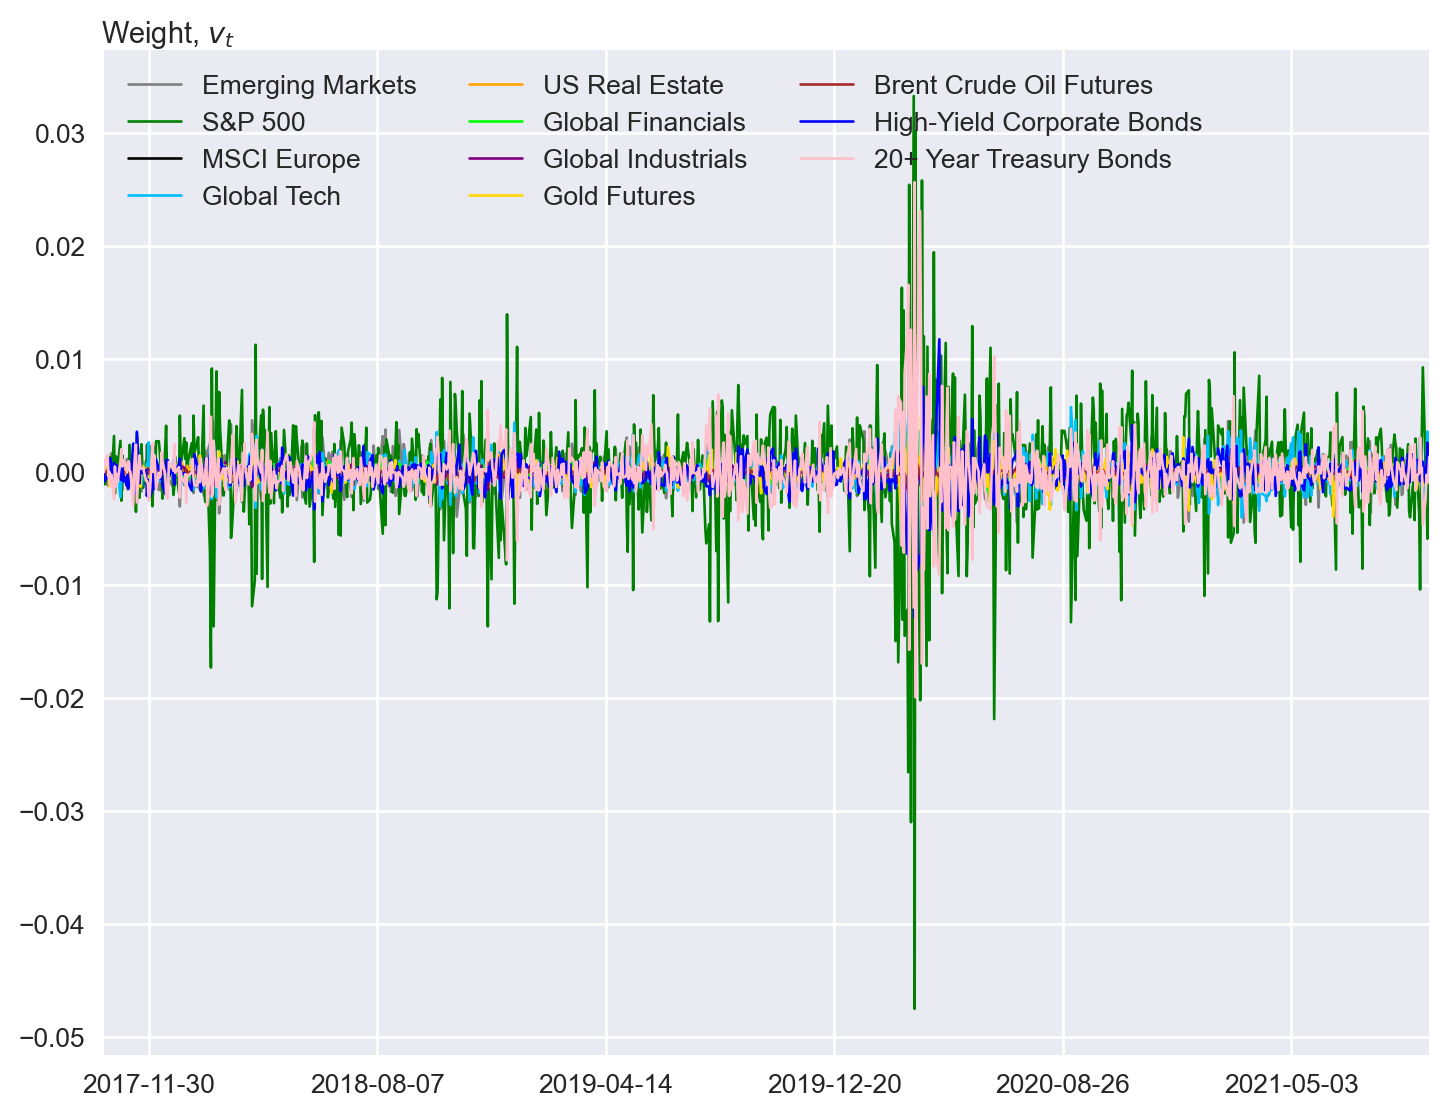

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_TC.,linewidth=1)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -82) 
#fig.savefig("GJRGARCH_weight_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
res_tc_TC.loc["2020-02-19":"2020-05-01"]

In [43]:
res_tc_TC.loc["2020-02-19":"2020-05-01"]

,ARCH(1),"GARCH(1,1)","GJR-GARCH(1,1)",Equal weight,Buy and hold
Date,,,,,
2020-02-19,1.216343,1.167203,1.193480,1.202334,1.269528
2020-02-20,1.221343,1.171945,1.197978,1.200388,1.274716
2020-02-21,1.223465,1.172586,1.198380,1.196269,1.275538
2020-02-24,1.219886,1.164188,1.189378,1.168285,1.267068
2020-02-25,1.210703,1.147713,1.172775,1.145583,1.250035
2020-02-26,1.207945,1.139630,1.164819,1.141239,1.244069
2020-02-27,1.195865,1.122138,1.146837,1.108753,1.225504
2020-02-28,1.200852,1.119994,1.145876,1.095316,1.224974
2020-03-02,1.212385,1.134319,1.160703,1.121009,1.246375


In [44]:
v_t_GARCH_TC.loc["2020-02-19":"2020-05-01"].diff()*100

,EEM,IVV,IEV,IXN,IYR,IXG,EXI,GC=F,BZ=F,HYG,TLT
Date,,,,,,,,,,,
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20,-0.069314,0.194640,-0.019939,-0.144345,0.067768,-0.013789,0.012997,0.029152,0.018495,-0.040827,-0.034837
2020-02-21,0.234057,-0.476270,0.046198,0.245343,-0.031762,0.043934,-0.057634,0.013564,-0.000785,-0.102510,0.085865
2020-02-24,0.077610,-0.644431,0.016804,0.310093,-0.004737,0.035853,-0.047070,0.147263,-0.012349,-0.076416,0.197381
2020-02-25,0.356423,-1.519289,0.165708,0.497680,0.031450,0.131462,-0.212392,0.218771,-0.025856,-0.163368,0.519409
2020-02-26,-0.066555,-0.912192,0.040632,0.192334,0.063290,0.065094,-0.115046,-0.014093,-0.008392,0.287325,0.467605
2020-02-27,-0.146200,0.056840,-0.025192,-0.142035,0.026615,-0.014129,0.015347,0.006561,-0.018345,0.250625,-0.010086
2020-02-28,0.106733,-1.693937,0.068596,0.539192,0.179214,0.115353,-0.147858,0.140485,-0.006823,0.057730,0.641313
2020-03-02,0.023067,-0.408867,0.027441,-0.164699,0.133918,0.080956,-0.101739,-0.423879,-0.023454,0.243845,0.613410
